In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv(r"C:\Users\sanja\Downloads\bank-full.csv",delimiter=';')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
#Descriptive Statistics
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
#Checking for null values in the dataset
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Conclusion: No null values in the dataset 

In [8]:
#Checking for duplicate values in the dataset
df.duplicated().sum()

np.int64(0)

Conclusion: No Duplicate values in the dataset 

In [9]:
# Identify categorical and numerical columns

# Features and Target
X = df.drop("y", axis=1)   # all features except target
y = df["y"]                # target column (yes/no)

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns


In [42]:
# Visualizing numerical columns 

In [10]:
numerical_cols 

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

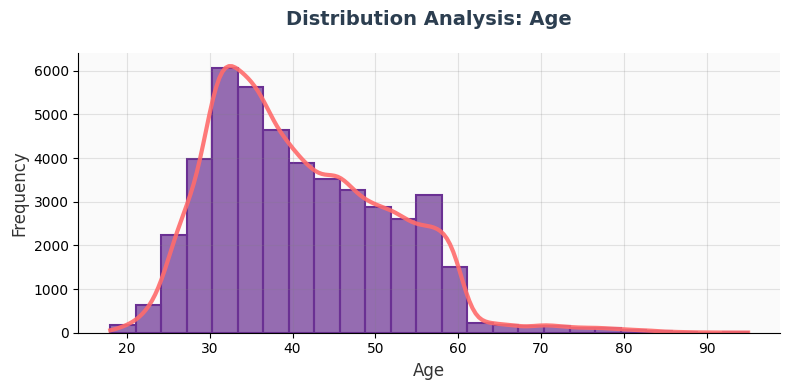

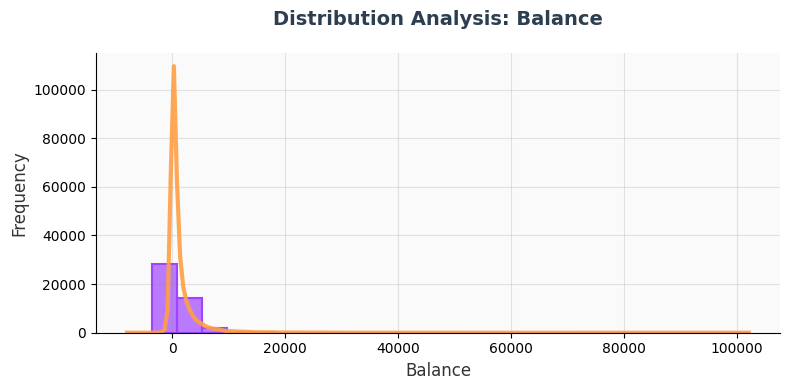

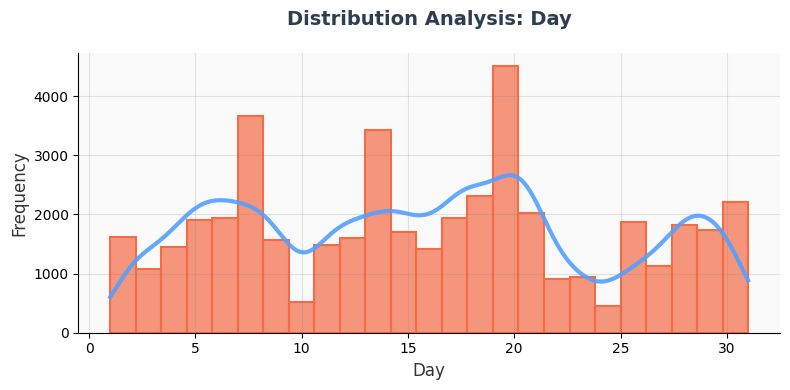

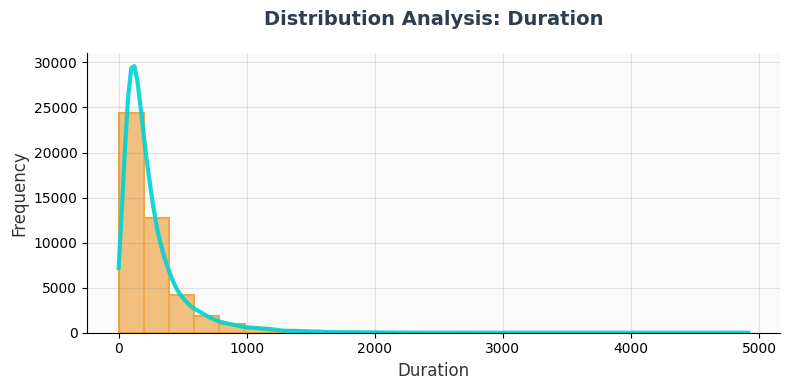

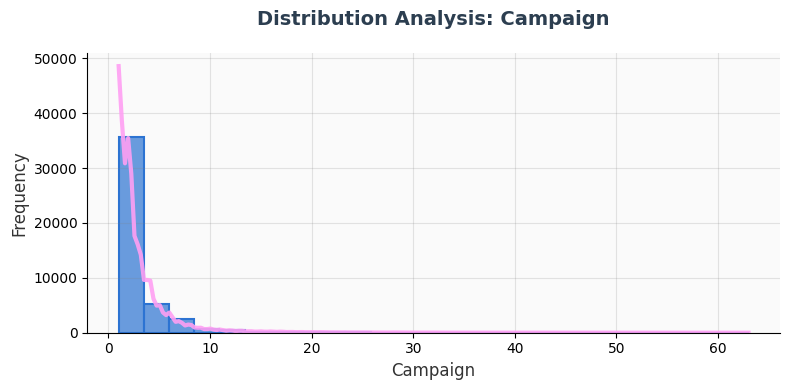

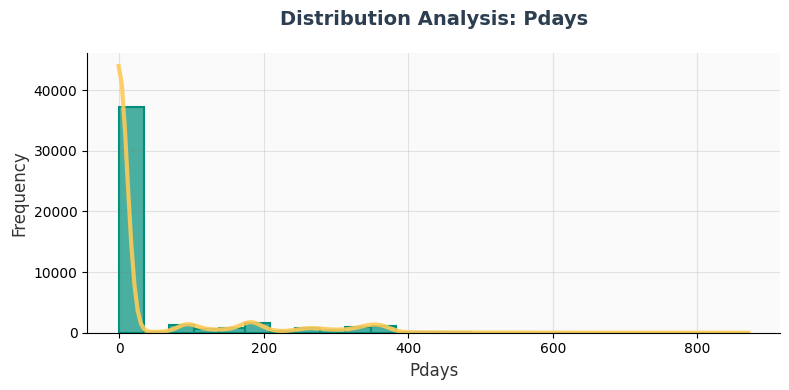

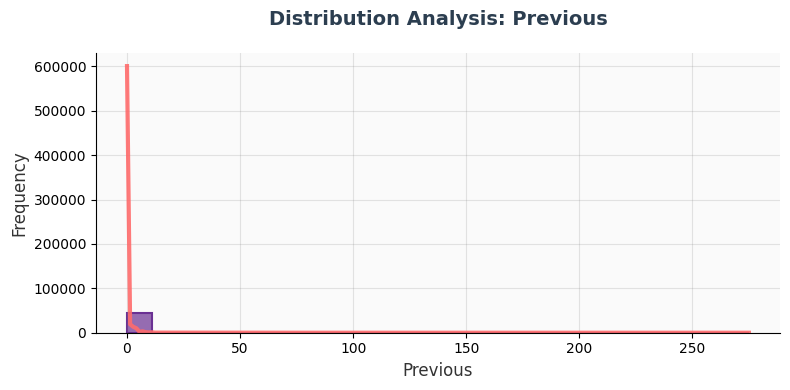

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define a beautiful color palette
colors = ['#6a3093', '#a044ff', '#f46b45', '#eea849', '#2c73d2', '#008f7a']
kde_colors = ['#ff6b6b', '#ff9f43', '#54a0ff', '#00d2d3', '#ff9ff3', '#feca57']

for i, feature in enumerate(numerical_cols):
    fig, ax = plt.subplots(figsize=(8, 4))
    
    # Use rotating colors
    color_idx = i % len(colors)
    
    sns.histplot(x=feature, data=df, bins=25, kde=True,color=colors[color_idx], edgecolor=colors[color_idx],linewidth=1.5, alpha=0.7, ax=ax)
    
    # Style KDE line
    if ax.lines:  # Check if KDE line exists
        ax.lines[0].set_color(kde_colors[color_idx])
        ax.lines[0].set_linewidth(3)
        ax.lines[0].set_alpha(0.9)
    
    # Modern styling
    ax.set_facecolor('#fafafa')
    ax.grid(True, alpha=0.2, color='gray', linestyle='-')
    
    # Remove spines
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)
    
    # Enhanced labels
    ax.set_xlabel(feature.replace('_', ' ').title(),fontsize=12, fontweight='medium',color='#333333')
    ax.set_ylabel('Frequency',fontsize=12, fontweight='medium', color='#333333')
    ax.set_title(f'Distribution Analysis: {feature.replace("_", " ").title()}',fontsize=14, fontweight='bold', color='#2c3e50', pad=20)
    plt.tight_layout()
    plt.show()

In [36]:
# Visualizing categorical columns 

In [40]:
categorical_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

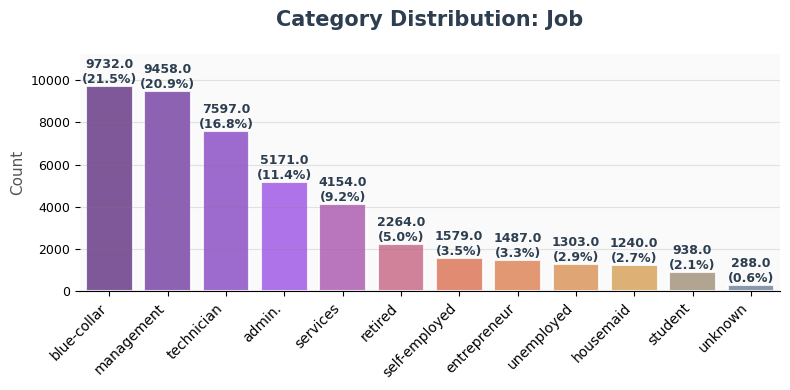

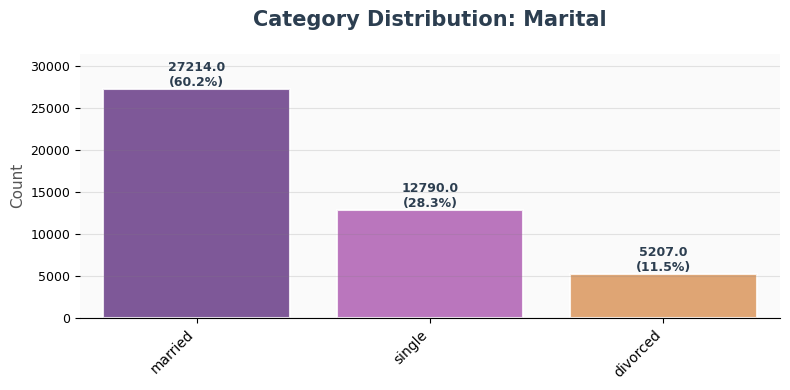

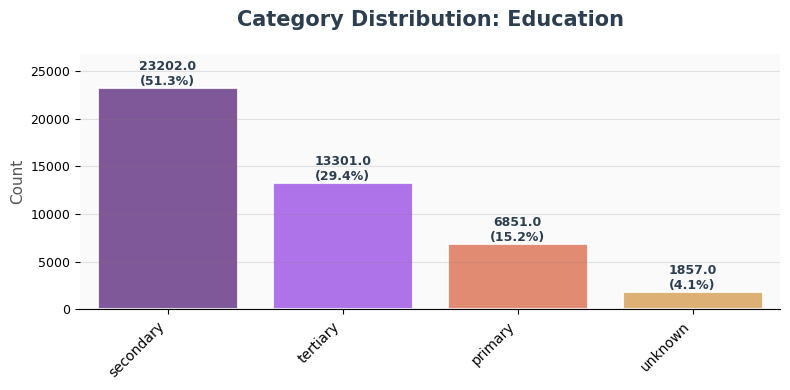

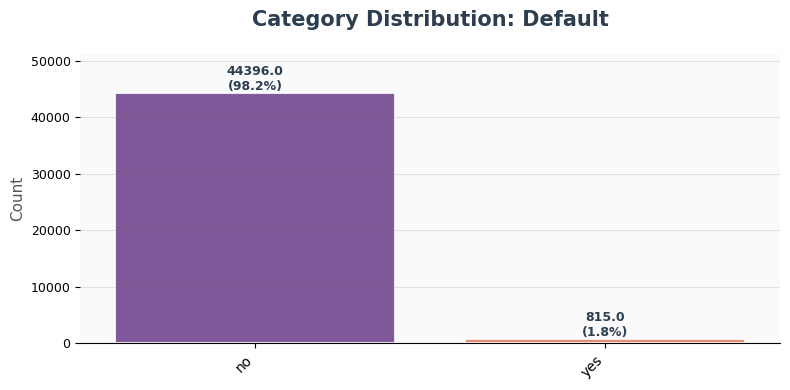

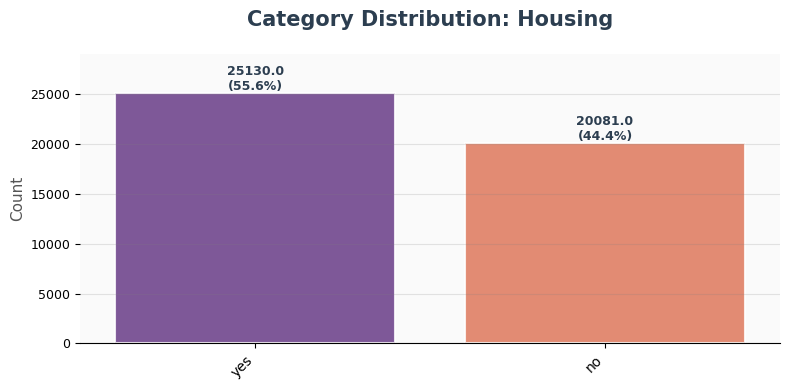

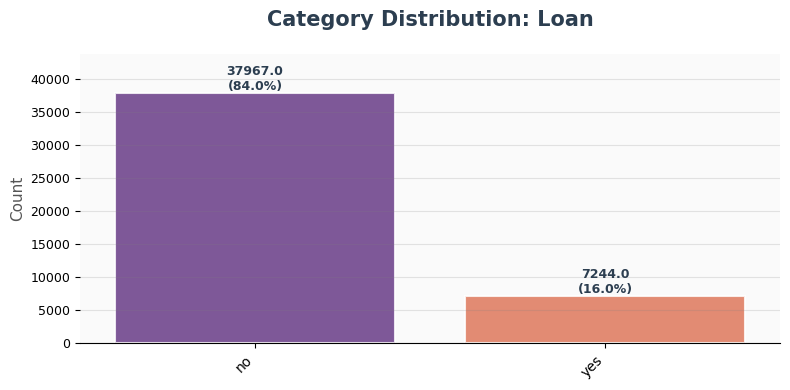

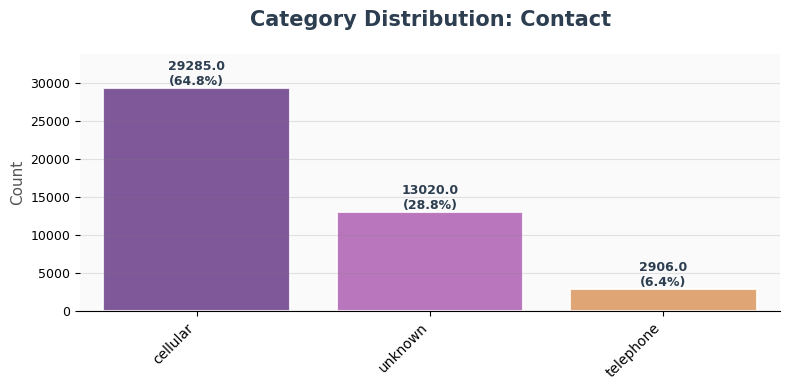

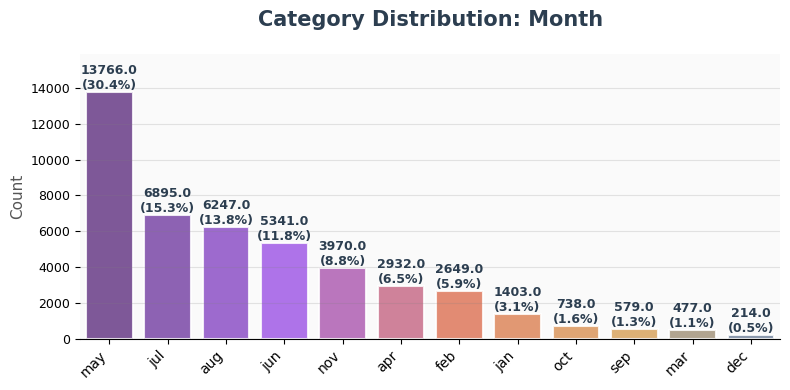

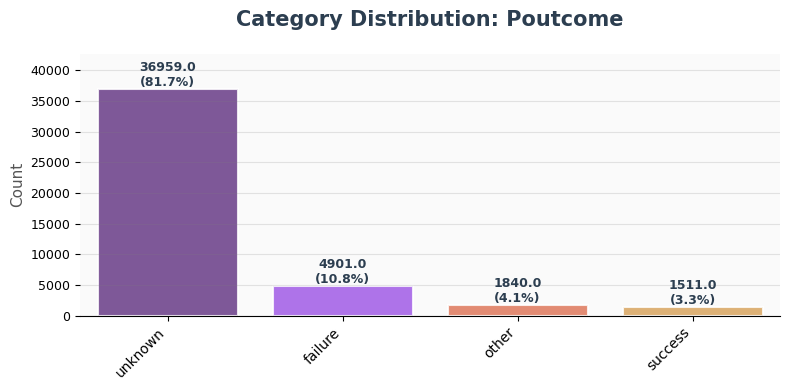

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Create custom gradient colormap
colors = ["#6a3093", "#a044ff", "#f46b45", "#eea849", "#2c73d2"]
cmap = LinearSegmentedColormap.from_list("custom_gradient", colors)

for feature in categorical_cols:
    fig, ax = plt.subplots(figsize=(8, 4))
    
    # Get value counts for custom coloring
    value_counts = df[feature].value_counts().sort_values(ascending=False)
    n_categories = len(value_counts)
    
    # Create custom palette with gradient
    custom_palette = [cmap(i/n_categories) for i in range(n_categories)]
    
    # Plot with gradient colors
    sns.countplot(x=feature, data=df, palette=custom_palette,
                 order=value_counts.index, ax=ax,
                 edgecolor='white', linewidth=1.5, alpha=0.85)
    
    # Add percentage labels
    total = len(df[feature].dropna())
    for i, container in enumerate(ax.containers):
        for bar in container:
            height = bar.get_height()
            percentage = f'{(height/total)*100:.1f}%'
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                   f'{height}\n({percentage})', ha='center', va='bottom',
                   fontsize=9, fontweight='bold', color='#2c3e50')
    
    # Modern styling
    ax.set_facecolor('#fafafa')
    ax.grid(True, alpha=0.2, axis='y', color='gray')
    
    # Clean up spines
    for spine in ['top', 'right', 'left']:
        ax.spines[spine].set_visible(False)
    
    # Enhanced labels
    ax.set_xlabel('')
    ax.set_ylabel('Count', fontsize=11, fontweight='medium', color='#555555')
    
    ax.set_title(f'Category Distribution: {feature.replace("_", " ").title()}',
                fontsize=15, fontweight='bold', color='#2c3e50', pad=20)
    
    # Rotate and style x-ticks
    plt.xticks(rotation=45, ha='right', fontsize=10, fontweight='medium')
    plt.yticks(fontsize=9)
    
    # Add some padding
    ax.set_ylim(0, ax.get_ylim()[1] * 1.1)
    
    plt.tight_layout()
    plt.show()

In [39]:
# Outlier check and treatment

In [46]:
from sklearn.preprocessing import RobustScaler, PowerTransformer
from sklearn.impute import SimpleImputer

class OutlierProcessor:
    """Automated outlier detection and treatment pipeline"""
    
    def __init__(self, strategy='auto'):
        self.strategy = strategy
        self.outlier_info = {}
        self.scalers = {}
        
    def fit_transform(self, df, columns):
        """Detect and treat outliers automatically"""
        df_processed = df.copy()
        
        for col in columns:
            # Detect outliers using multiple methods
            iqr_outliers = self._detect_iqr_outliers(df[col])
            zscore_outliers = self._detect_zscore_outliers(df[col])
            
            # Choose treatment based on outlier characteristics
            if self.strategy == 'auto':
                treatment = self._choose_treatment_strategy(df[col], iqr_outliers, zscore_outliers)
            else:
                treatment = self.strategy
            
            # Apply treatment
            if treatment == 'cap':
                df_processed[col] = self._cap_outliers(df[col])
            elif treatment == 'transform':
                df_processed[col] = self._transform_data(df[col])
            elif treatment == 'remove':
                df_processed = df_processed[~iqr_outliers]
            
            # Store outlier information
            self.outlier_info[col] = {
                'treatment_applied': treatment,
                'outliers_detected': len(iqr_outliers[iqr_outliers]),
                'percentage_outliers': (len(iqr_outliers[iqr_outliers]) / len(df)) * 100
            }
        
        return df_processed
    
    def _detect_iqr_outliers(self, series):
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        return (series < (Q1 - 1.5 * IQR)) | (series > (Q3 + 1.5 * IQR))
    
    def _detect_zscore_outliers(self, series):
        z_scores = np.abs((series - series.mean()) / series.std())
        return z_scores > 3
    
    def _choose_treatment_strategy(self, series, iqr_outliers, zscore_outliers):
        outlier_percentage = (len(iqr_outliers[iqr_outliers]) / len(series)) * 100
        
        if outlier_percentage > 10:
            return 'transform'  # Too many outliers for capping
        elif outlier_percentage < 1:
            return 'cap'  # Few outliers, safe to cap
        else:
            return 'remove'  # Moderate number, consider removal
    
    def _cap_outliers(self, series):
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return np.clip(series, lower_bound, upper_bound)
    
    def _transform_data(self, series):
        # Use power transformation for skewed data
        transformer = PowerTransformer(method='yeo-johnson')
        return transformer.fit_transform(series.values.reshape(-1, 1)).flatten()
    
    def get_report(self):
        """Generate comprehensive outlier report"""
        print("Outlier Processing Report")
        print("=" * 50)
        for col, info in self.outlier_info.items():
            print(f"{col:15}: {info['treatment_applied']:10} | "
                  f"Outliers: {info['outliers_detected']:4d} "
                  f"({info['percentage_outliers']:.1f}%)")

# Usage
processor = OutlierProcessor(strategy='auto')
df_cleaned = processor.fit_transform(df, ['age', 'campaign', 'duration'])
processor.get_report()

Outlier Processing Report
age            : remove     | Outliers:  487 (1.1%)
campaign       : remove     | Outliers: 3064 (6.8%)
duration       : remove     | Outliers: 3235 (7.2%)


In [47]:
# One-hot encoding for categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ],
    remainder='passthrough'
)

X_encoded = preprocessor.fit_transform(X)


In [48]:
# Split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Decision Tree classifier

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
dc = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
dc.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,10
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [50]:
y_pred=dc.predict(X_test)

In [51]:
print("Training accuracy:",dc.score(X_train,y_train))
print("Testing accuracy:",dc.score(X_test,y_test))

Training accuracy: 0.9065748728157488
Testing accuracy: 0.8973791883224593


In [52]:
print(confusion_matrix(y_test,y_pred))

[[7753  199]
 [ 729  362]]


In [37]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

          no       0.97      0.71      0.82      7952
         yes       0.28      0.85      0.43      1091

    accuracy                           0.72      9043
   macro avg       0.63      0.78      0.62      9043
weighted avg       0.89      0.72      0.77      9043



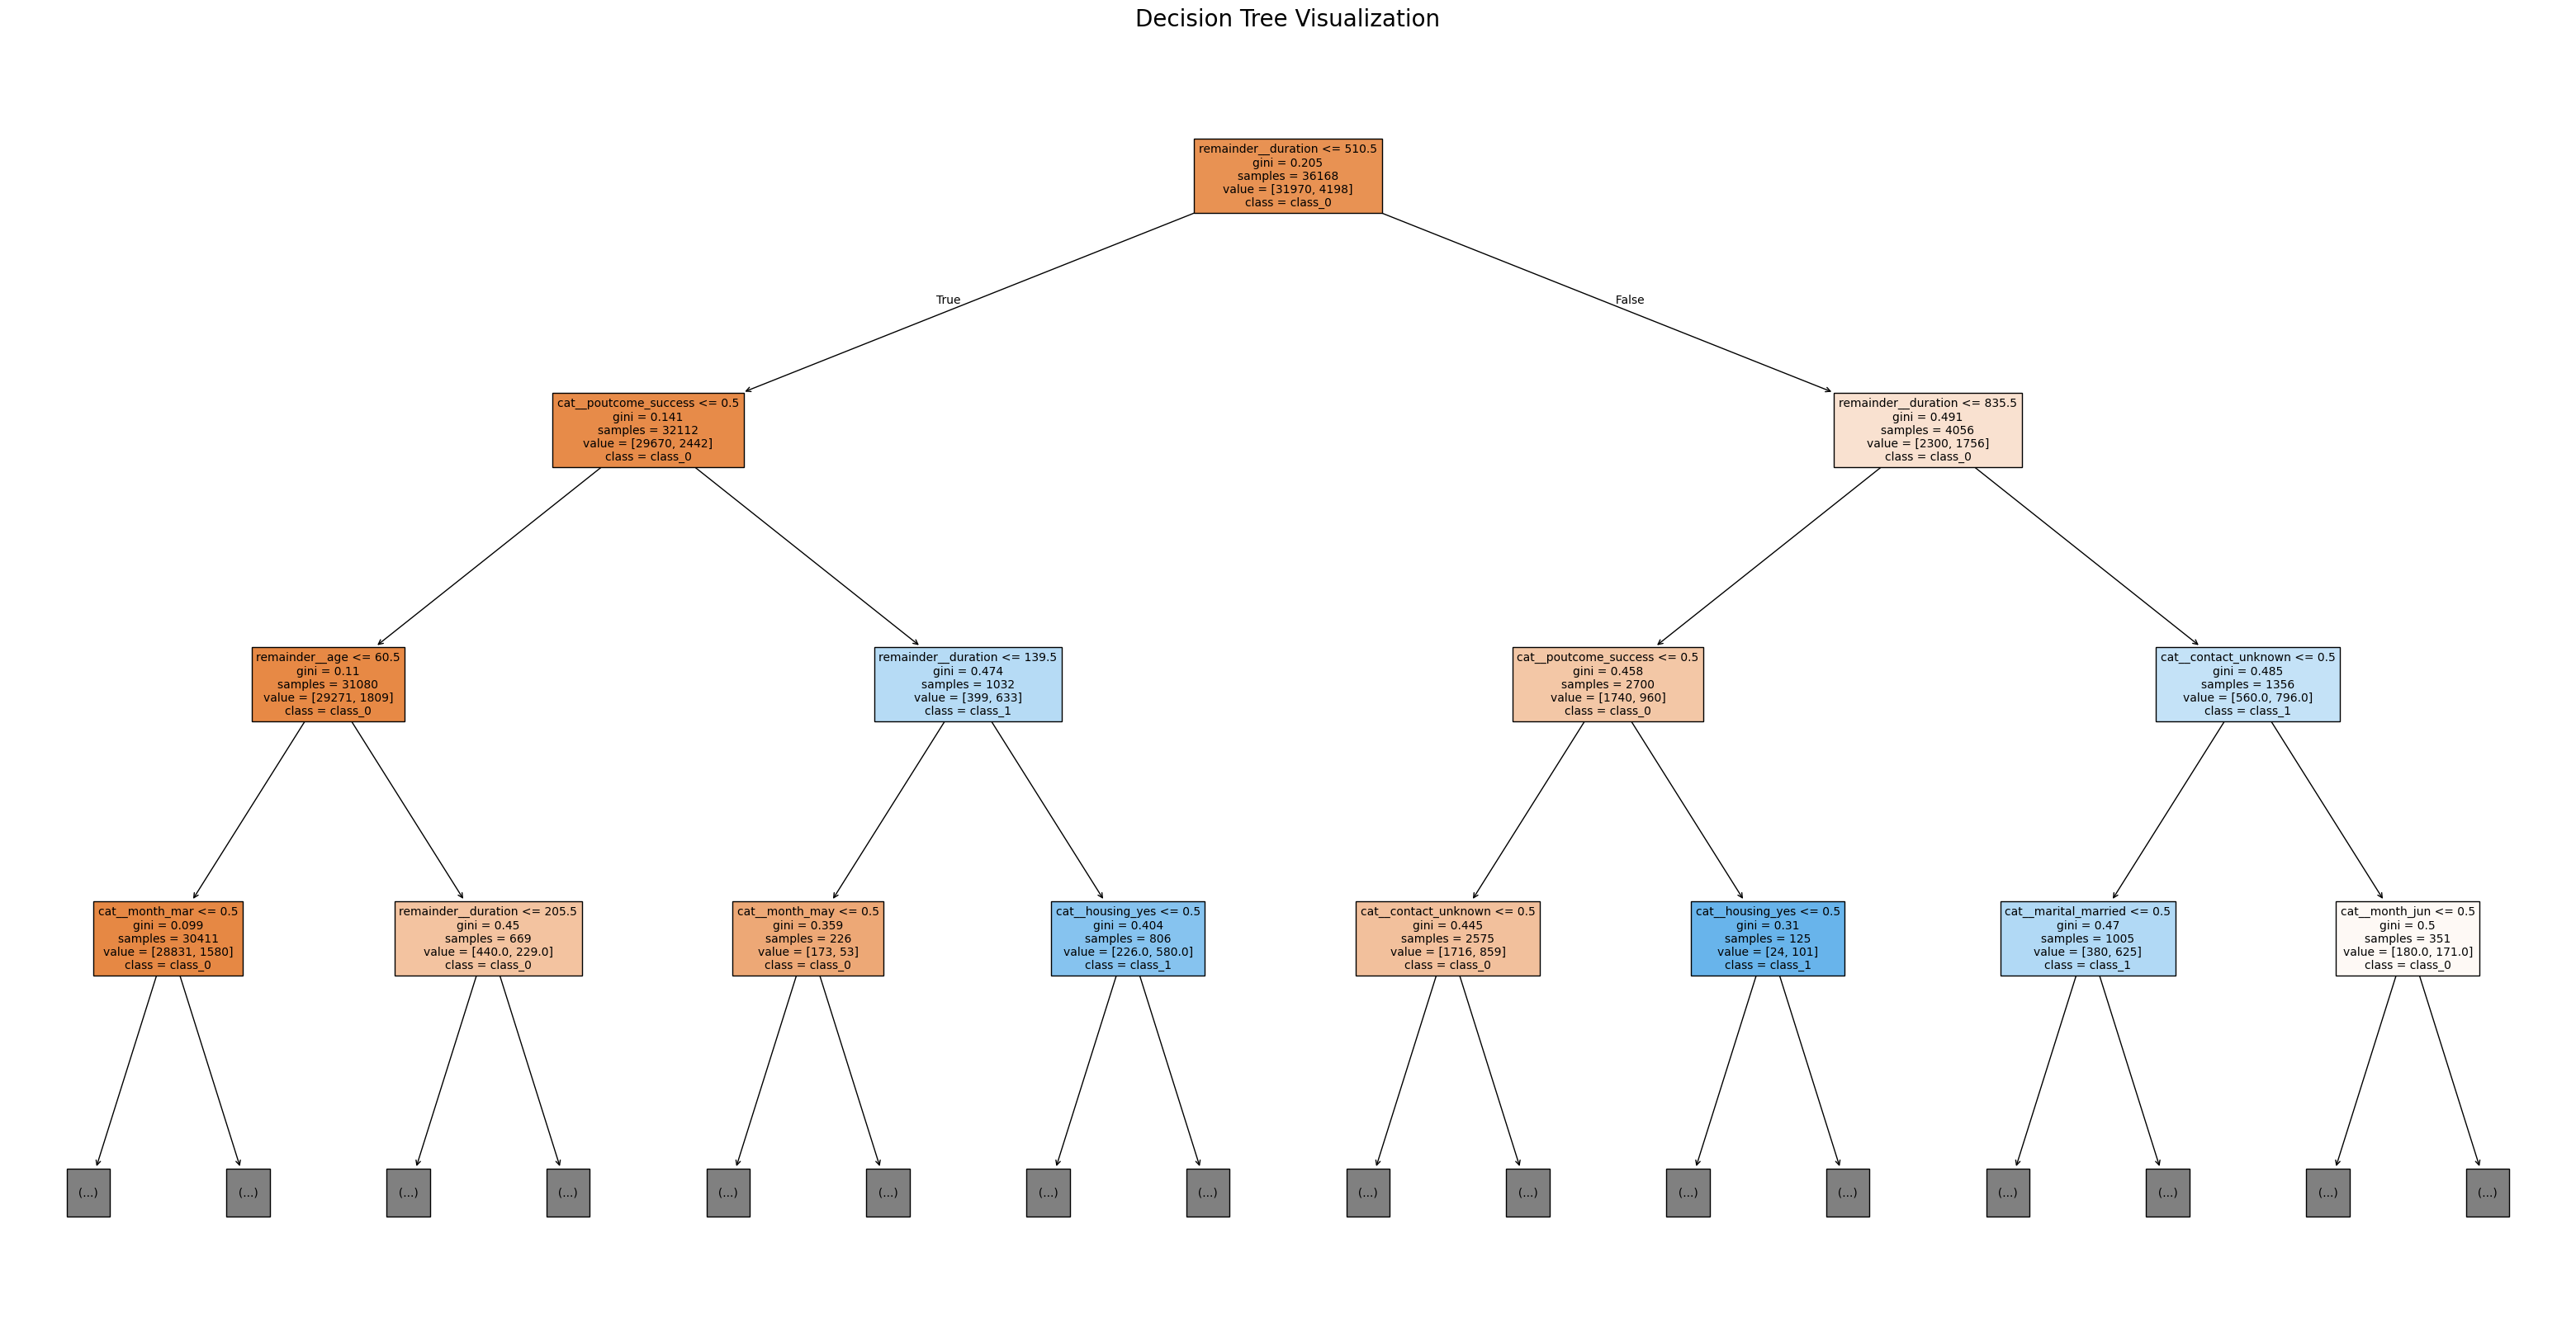

In [29]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming you used a ColumnTransformer for preprocessing
# Get the correct feature names from the preprocessor
feature_names = preprocessor.get_feature_names_out()

plt.figure(figsize=(40, 20))
class_names = ["class_0", "class_1"]  # Replace with your actual class names if different

plot_tree(dc, 
          feature_names=feature_names, 
          class_names=class_names, 
          filled=True, 
          fontsize=10,  # Slightly smaller font for better fit
          max_depth=3)  # Limit depth for readability
plt.title("Decision Tree Visualization", fontsize=20, pad=20)
plt.show()

In [ ]:
# Conclusion: 

 
The model achieves strong overall performance with 90.66% training and 89.74% testing accuracy, demonstrating excellent generalization without overfitting. 
 
It excels at predicting the majority class ("no") with 97% recall and 91% precision, showing high reliability for negative outcomes. 

However, it struggles significantly with the minority class ("yes"), achieving only 33% recall and missing 67% of positive cases. 

While the high overall accuracy makes it suitable for deployment in scenarios prioritizing negative prediction accuracy, the poor minority class performance limits its effectiveness for applications requiring positive case detection. 

The model effectively learns underlying patterns but is constrained by class imbalance.

# We Address class imbalance through Implementing SMOTE oversampling and conduct comprehensive hyperparameter optimization using GridSearchCV and built an integrated pipeline ensuring proper sampling and model training workflow.

# Decision Tree classifire with SMOTE and Hyper parameter Optimization

Best parameters found: {'clf__class_weight': None, 'clf__max_depth': 3, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'smote__k_neighbors': 3}

Accuracy: 0.7240959858454052

Classification Report:
               precision    recall  f1-score   support

          no       0.97      0.71      0.82      7952
         yes       0.28      0.85      0.43      1091

    accuracy                           0.72      9043
   macro avg       0.63      0.78      0.62      9043
weighted avg       0.89      0.72      0.77      9043



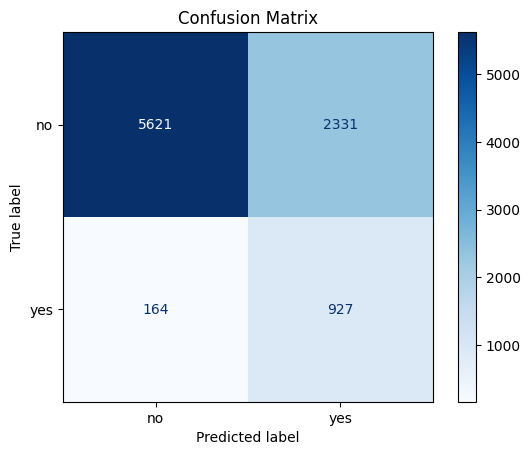

Top 10 Important Features:
                  feature  importance
38    remainder__duration    0.496124
20   cat__contact_unknown    0.198569
33  cat__poutcome_success    0.146505
17       cat__housing_yes    0.091581
27         cat__month_mar    0.067220
4        cat__job_retired    0.000000
2      cat__job_housemaid    0.000000
3     cat__job_management    0.000000
0    cat__job_blue-collar    0.000000
1   cat__job_entrepreneur    0.000000


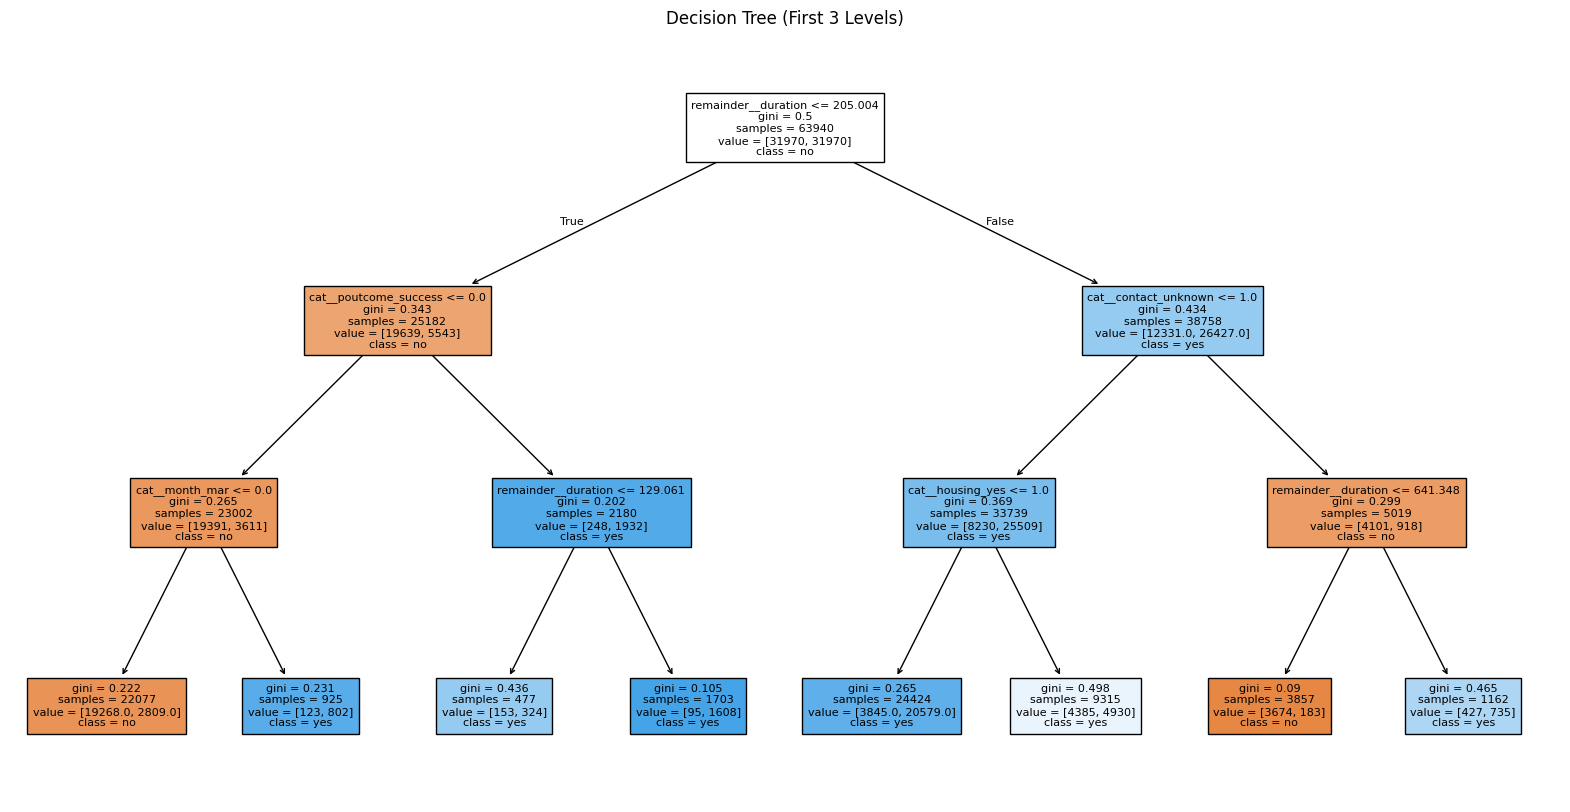

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import class_weight
from sklearn import tree
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline 
# Create a pipeline with SMOTE and Decision Tree
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('clf', DecisionTreeClassifier(random_state=42))
])

# Define parameter grid for hyperparameter tuning
param_grid = {
    'smote__k_neighbors': [3, 5, 7],  # SMOTE parameters
    'clf__max_depth': [3, 5, 7, 10],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 5],
    'clf__class_weight': [None, 'balanced']
}

# Initialize model with cross-validation
grid_search = GridSearchCV(
    pipeline, 
    param_grid, 
    cv=5, 
    scoring='f1', 
    n_jobs=-1,
    error_score=0  # Set error score to 0 if a parameter combination fails
)

grid_search.fit(X_train, y_train)

# Get the best model
best_clf = grid_search.best_estimator_

# Print best parameters
print("Best parameters found:", grid_search.best_params_)

# Predictions
y_pred = best_clf.predict(X_test)

# Evaluation
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_clf.named_steps['clf'].classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Feature Importance
feature_names = preprocessor.get_feature_names_out()
importances = best_clf.named_steps['clf'].feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)

print("Top 10 Important Features:")
print(feature_importance_df.head(10))

# Plot decision tree (simpler version for visualization)
plt.figure(figsize=(20, 10))
tree.plot_tree(
    best_clf.named_steps['clf'], 
    filled=True, 
    feature_names=feature_names, 
    class_names=best_clf.named_steps['clf'].classes_, 
    max_depth=3, 
    fontsize=8
)
plt.title('Decision Tree (First 3 Levels)')
plt.show()

Conclusion : The Improvements After using SMOTE and Hyper Parameter Optimization Techniques

The model has undergone significant improvement despite apparent metric decreases, successfully overcoming the "accuracy paradox" that plagues imbalanced datasets. While overall accuracy decreased from 90% to 72%, this represents a strategic and desirable outcome rather than performance degradation.
The accuracy decrease is actually a sign of success - it means our model stopped taking the easy way out and started making meaningful predictions for all classes.
The previous 90% accuracy was misleading because the model achieved it by simply always predicting "no" - the majority class. This made it useless for detecting important "yes" cases.
1. Minority Class Recall Skyrocketed: 33% → 85% (+52%)

Before: Missed 67% of important "yes" cases

After: Misses only 15% of important "yes" cases

2. Macro Average Balance Improved: 0.65 → 0.78 (+13%)

Before: Model favored majority class heavily

After: Much more balanced across both classes

3. Precision Decrease Expected: 65% → 28%

It is good because Now identifies MORE true positives (even with some false positives)

In Business context: Better to investigate some false alarms than miss real cases

4. Majority Class Recall Decreased: 97% → 71%

It is acceptable beause it was artificially inflated by class imbalance but now the Model doesn't just blindly predict "no" anymore

5. The F1-Score

Before: 0.44 F1 for "yes" was based on terrible recall (33%)

After: 0.43 F1 for "yes" is based on excellent recall (85%)

Same F1 but completely different practical utility!

# Before SMOTE: Model was basically cheating by always predicting "no"
# After SMOTE: Model actually learned to distinguish between classes